The objective of this work is to implement and evaluate several algorithms, namely gradient, simplex, gauss newton, levenberg marquart on the rosenbrock function with $p =100$ and $x_0 = (-1.9,2)$ (aka banana function).

We recall that the rosenbrock function is written
$$f(x,p)=p(x_2-x_1^2)^2+(1-x_1)^2$$

its gradient is
$$\nabla f(x)=\begin{bmatrix}-4p(x_2-x_1^2)x_1-2(1-x_1) \\ 2p(x_2-x_1^2)\end{bmatrix}$$

The optimality condition imposes
$$\nabla f(x) = \begin{bmatrix}0\\0\end{bmatrix}$$
and thus

\begin{align}
    x_2&=x_1^2\\
    x_1&=1
\end{align}

and $x^* = (1,1)$



# Plot the function

Use python contour function to plot this function from top view.



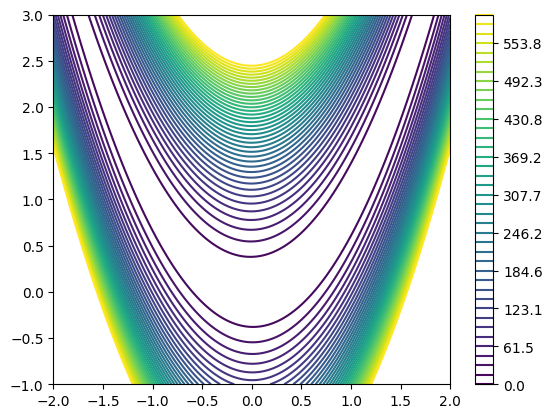

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rosen(x) :
    return 100*(x[1]-x[0]**2)**2+(1-x[0])**2

def rosen_der(x) :
    derx1 = -400*(x[1]-x[0]**2)*x[0]-2*(1-x[0])
    derx2 = 200*(x[1]-x[0]**2)
    return np.array([derx1,derx2])
def rosen_hess(x):

    h11 = 1200 * x[0]**2 - 400 * x[1] + 2
    h12 = -400 * x[0]
    h21 = -400 * x[0]
    h22 = 200
    return np.array([[h11, h12],
                     [h21, h22]])
x1, x2 = np.meshgrid(np.linspace(-2,2,201),np.linspace(-1,3,201))

#trace des lignes de niveaux
plt.contour (x1,x2,rosen(np.array([x1,x2])),np.linspace(0,600,40))
plt.colorbar()
plt.show()



## With python optimise. (That is not required here, but just to check our implementation.)





In [ ]:
from scipy.optimize import minimize

x0 = np.array([1.9, 2])
res = minimize(rosen, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})
print("Nelder-Mead Method",res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 94
         Function evaluations: 180
Nelder-Mead Method        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.1536237483173472e-17
             x: [ 1.000e+00  1.000e+00]
           nit: 94
          nfev: 180
 final_simplex: (array([[ 1.000e+00,  1.000e+00],
                       [ 1.000e+00,  1.000e+00],
                       [ 1.000e+00,  1.000e+00]]), array([ 1.154e-17,  1.389e-17,  5.866e-17]))


In [ ]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
               options={'disp': True})
print("Gradient method :", res)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 39
         Gradient evaluations: 39
Gradient method :   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 8.411885895684712e-15
        x: [ 1.000e+00  1.000e+00]
      nit: 26
      jac: [ 3.443e-06 -1.749e-06]
 hess_inv: [[ 4.998e-01  9.995e-01]
            [ 9.995e-01  2.004e+00]]
     nfev: 39
     njev: 39


# For each method
1. Implement the algorithm.
2. Test the algorithm on the rosenbrock function for two different starting point
3. Log the points computed at each step and plot them on the figure in a specific color for each algorithm.
4. Log the number of steps needed to reach the optimum for a given stop criteria.
5. Log the residuals.
6. Sum up the results on a graph and in a table.




# Reminder : numerical method basic algo structure

In [ ]:
def algo (F , x0 , ... , tol =1 e -6 , Niter =1000) :
    # Initialisation
    xn = x0 # first element of the sequence
    L = [] # list [x_0 , ... x_{n -1}] , empty
    # Boucle principale
    for n in range ( Niter ) : # no while, never !
        if ... < tol : # if tolerance threshold is reached ,
            return xn , L # return list [x_0 , ... x_{n -1}].
        L . append ( xn ) # else update list with xn,
        xn = ... # update xn with new value

    print (" Error , algo failed after ", Niter , " iterations ")

SyntaxError: invalid syntax (<ipython-input-5-12cc5dc98fa1>, line 1)

In [ ]:
def dichotomieMin (F , a, b,  tol =10**(-6) , Niter =1000) :
    # Initialisation
    x1 = a
    x5 = b
    x3 = (x1+x5)/2
    x2 = (x1+x3)/2
    x4 = (x3+x5)/2
    y1, y3, y5 = 0,0,0
    xmin = []
    xmax = []
    xn = []
    # Main loop
    for n in range ( Niter ) : # no while  !

        x2 = (x1+x3)/2
        x4 = (x3+x5)/2
        f1 = F(x1)
        f2 = F(x2)
        f3 = F(x3)
        f4 = F(x4)
        f5 = F(x5)

        if (x5-x1) < tol : # if the stop criteria is reached ,
            return xn, xmin, xmax # retunr xn and the liste [x_0 , ... x_{n -1}].
        else :
            if f1 < f2 < f3 < f4  < f5 :
                    y1=x1
                    y5=x2
                    y3=(y1+y5)/2
            elif f1 > f2 < f3  < f4  < f5 :
                    y1=x1
                    y5=x3
                    y3=x2
            elif f1 > f2 > f3  < f4  < f5 :
                    y1=x2
                    y5=x4
                    y3=x3
            elif f1 > f2 > f3  > f4  < f5 :
                    y1=x3
                    y5=x5
                    y3=x4
            else :
                    y1=x4
                    y5=x5
                    y3=(y1+y5)/2
            x1=y1
            x3=y3
            x5=y5
            xmin.append(x1)
            xmax.append(x5)
            xn.append(x3)

    print (" Error , no convergence ", Niter , " iterations ")
    return xn, xmin, xmax

# Definition:  Gradient descent algorithm

## Fixed step gradient method

A common variant of the optimal step gradient algorithm is the constant step gradient algorithm. It does not vary $\alpha$ and thus avoids the linear search.


**Algorithm**

$$x_{k+1}=x_k - \alpha \nabla f(x_k)$$

with

$$\alpha >0 $$

## Optimal step gradient method


The most classical method for solving a multivariate numerical optimization problem is the steepest gradient method. It is also called the optimal gradient method. It comes from the following observation:

Let $f:\mathbb{R}^n \to \mathbb{R}$, $f \in C^1$

$-\nabla f(x_k)$ indicates the direction with the largest rate of decay of $f$ at the point $x_k$


**Algorithm**

$$x_{k+1}=x_k - \alpha_k \nabla f(x_k)$$

with a one-dimensional search on $\alpha$ to obtain the best possible point on the descent direction indicated by the opposite of the gradient.

$$\alpha_k = \arg\underset{\alpha_k >0} \min f(x_k-\alpha_k \nabla f(x_k)) $$

## Remark on the choice of the stopping criterion

In theory, we should choose as stopping criterion the arrival on zero gradient. But this would lead to too many iterations. So we will combine several stopping criteria.

In theory, we should stop the Newton algorithm when the gradient is zero.

**Possible criteria**

* $\Vert \nabla f(x_k)\Vert < \epsilon_1$
* $\left| \frac{f(x_{k+1})-f(x_k))}{f(x_k)}\right|<\epsilon_2$
* $|x_{k+1}-x_k|<\epsilon_3$

##Remarks on evaluation of the gradient

Sometimes we cannot evaluate the values of the gradient from the analytical form of the derivatives of the function if

* Case 1 - $f\in C^1$, but the computation of $nabla f$ is too complicated
* Case 2 - $f \nabla f$ is known analytically but requires too much calculation for its evaluation
* Case 3 - $f \notin C^1$

**Case 1 and Case 2**

If the $f \notin C^1$ is known analytically, we will use an approximation of $f \nabla f$ using finite differences.

$$ \frac{\partial f}{\partial x_i}(x) \approx \frac{f(x+hu_i)-f(x)}{h} \mbox {, avec } u_i = \begin{bmatrix} 0 \\ \vdots \\ 0 \\1 \\ 0 \\ \vdots \\0 \end{bmatrix}\mbox{ and i is the ième ligne}$$

**Case 3**

if $f \notin C^1$, then you must go to another method.

Step number  14749


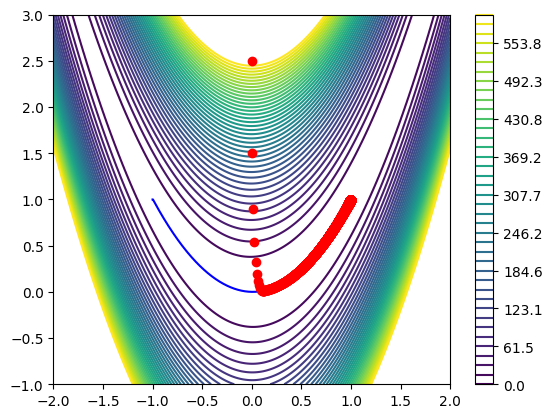

In [ ]:
def gradient (F , x0 , grad, alpha=0.002, tol =1e-3 , Niter =100000) :
    # Initialisation
    xn = x0 # first element of the sequence
    L = [x0] # list [x_0 , ... x_{n -1}] , empty

    # Main Loop
    for n in range ( Niter ) : # no while, never !
        if np.linalg.norm(grad(xn))< tol : # if tolerance threshold is reached ,
            return xn , np.array(L) # return list [x_0 , ... x_{n -1}].
        xn = xn - alpha*grad(xn).T # update xn with new value
        L . append ( xn ) # else update list with xn,
    print (" Error , algo failed after ", Niter , " iterations ")
    return xn,np.array(L)



x0 = [-1,1]
xn,L = gradient(rosen, x0, rosen_der, 0.001)

print("Step number ", len(L))

x0_2 = [0,2.5]
xn_2,L_2 = gradient(rosen, x0_2, rosen_der, 0.002)

x1, x2 = np.meshgrid(np.linspace(-2,2,201),np.linspace(-1,3,201))
#trace des lignes de niveaux
plt.contour (x1,x2,rosen(np.array([x1,x2])),np.linspace(0,600,40))
plt.plot(L[:,0], L[:,1],'b')
plt.plot(L_2[:,0], L_2[:,1],'ro')
plt.colorbar()
plt.show()



# Newton Method

If we develop $f$ in the neighborhood of $x^0$ by a Taylor expansion of the second order, we obtain :

$$f(x_0)\approx  f(x_0)+\nabla f(x_0)(x-x_0)+\frac{1}{2}(x-x_0)^T H(x_0)(x-x_0) $$

And if H is positive for $x^k$ :

$$ x_{k+1} = x_{k}- H (x_k)^{-1}\nabla f(x_k)$$

That we can also write

$$ x_{k+1} = x_{k}- H (x_k)^{-1}J(x_k)^T F(x_k) $$




Converged in 6 iterations.


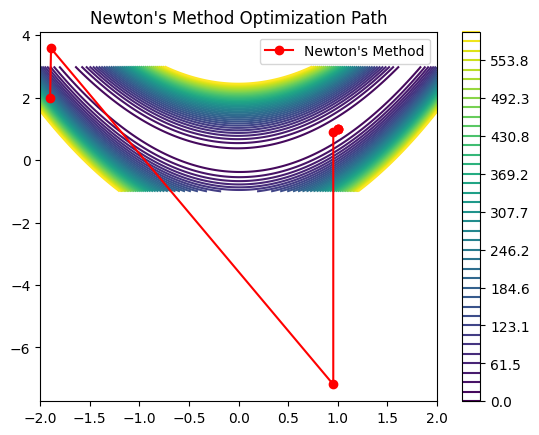

Optimal x: [1. 1.]
Optimal function value: 0.0


In [ ]:
import numpy as np

def newton_method(grad_f, hess_f, x0, tol=1e-3, max_iter=100):
    x = x0.copy()
    trajectory = [x.copy()]

    for i in range(max_iter):
        grad = grad_f(x)
        hess = hess_f(x)

        try:
            delta_x = np.linalg.solve(hess, -grad)
        except np.linalg.LinAlgError:
            print("Singular")
            break

        x = x + delta_x
        trajectory.append(x.copy())

        if np.linalg.norm(delta_x) < tol:
            print(f"Converged in {i+1} iterations.")
            break

    return x, np.array(trajectory)
x0 = np.array([-1.9, 2.0])

x_opt, traj = newton_method(rosen_der, rosen_hess, x0)

x1, x2 = np.meshgrid(np.linspace(-2, 2, 201), np.linspace(-1, 3, 201))
plt.contour(x1, x2, rosen(np.array([x1, x2])), levels=np.linspace(0, 600, 40))
plt.plot(traj[:, 0], traj[:, 1], 'ro-', label="Newton's Method")
plt.legend()
plt.colorbar()
plt.title("Newton's Method Optimization Path")
plt.show()
print("Optimal x:", x_opt)
print("Optimal function value:", rosen(x_opt))


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 41
         Gradient evaluations: 41


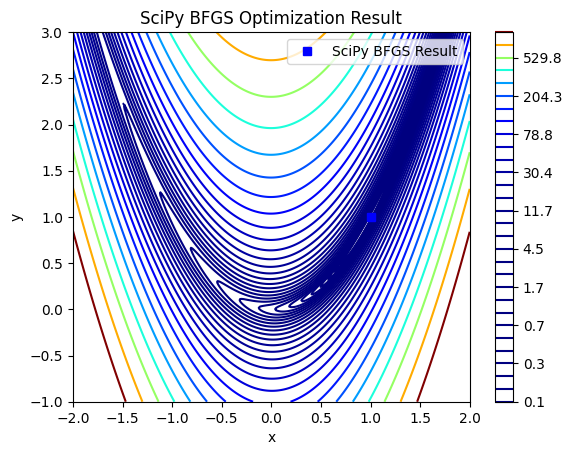

Optimal x: [1.         1.00000001]
Optimal function value: 2.166687334648506e-15
Number of iterations: 32


In [ ]:
x0 = np.array([-1.9, 2.0])

res = minimize(rosen, x0, method='BFGS', jac=rosen_der, options={'disp': True})


x1, x2 = np.meshgrid(np.linspace(-2, 2, 300), np.linspace(-1, 3, 300))
plt.contour(x1, x2, rosen(np.array([x1, x2])), levels=np.logspace(-1, 3, 30), cmap='jet')

plt.plot(res.x[0], res.x[1], 'bs', label='SciPy BFGS Result')

plt.legend()
plt.colorbar()
plt.title("SciPy BFGS")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("Optimal x:", res.x)
print("Optimal function value:", res.fun)
print("Number of iterations:", res.nit)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 213
         Function evaluations: 236
         Gradient evaluations: 236
         Hessian evaluations: 213
Newton-CG optimal x: [0.9999998  0.99999959]
Newton-CG optimal function value: 4.206566654772164e-14
Newton-CG iterations: 213


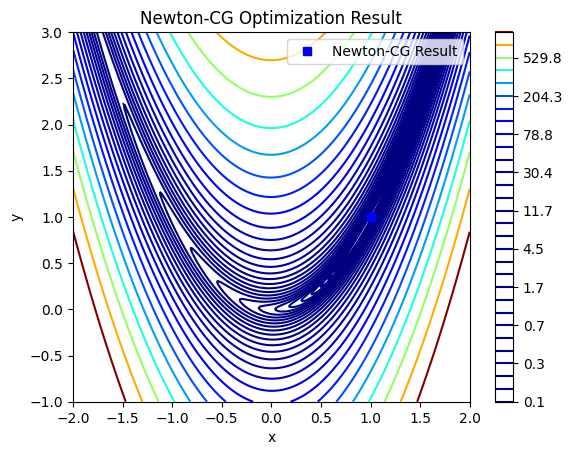

In [ ]:
x0 = np.array([-1.9, 2.0])

# Newton-CG method with gradient and Hessian
res = minimize(rosen, x0, method='Newton-CG', jac=rosen_der, hess=rosen_hess, options={'disp': True})

print("Newton-CG optimal x:", res.x)
print("Newton-CG optimal function value:", res.fun)
print("Newton-CG iterations:", res.nit)

# Visualization
x1, x2 = np.meshgrid(np.linspace(-2, 2, 300), np.linspace(-1, 3, 300))
plt.contour(x1, x2, rosen(np.array([x1, x2])), levels=np.logspace(-1, 3, 30), cmap='jet')
plt.plot(res.x[0], res.x[1], 'bs', label='Newton-CG Result')
plt.legend()
plt.colorbar()
plt.title("Newton-CG Optimization Result")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#Gauss Newton's method

if $\underset{x^k \to x^*} \lim f(x_k) = 0 $ then $\underset{x_k \to x^*} \lim H(x_k) \to J (x_k)^T J (x_k)$

And we can rewrite Newton's algortihme in Gauss Newton form. This allows us not to evaluate the Hessian which is sometimes very expensive.
$$x_{k+1} = x_{k}- \alpha_k (J (x_k)^T J (x_k))^{-1}J(x_k)^T F(x_k)$$

This algorithm has quadratic convergence if $f(x^*)=0$ and $J(x^*)$ is non-singular.

**Problem** if J is singular or ill-conditioned.


In [ ]:
def rosen_residual(x):
    r1 = 10 * (x[1] - x[0]**2)  # sqrt(100) = 10
    r2 = 1 - x[0]
    return np.array([r1, r2])

In [ ]:
def rosen_jacobian(x):
    # Partial derivatives of residual components
    dr1_dx1 = -20 * x[0]   # ∂r1/∂x1
    dr1_dx2 = 10           # ∂r1/∂x2
    dr2_dx1 = -1           # ∂r2/∂x1
    dr2_dx2 = 0            # ∂r2/∂x2
    return np.array([[dr1_dx1, dr1_dx2],
                     [dr2_dx1, dr2_dx2]])

In [ ]:
def gauss_newton(x0, residual_func, jacobian_func, tol=1e-6, max_iter=10000):
    x = x0.copy()
    trajectory = [x.copy()]
    for i in range(max_iter):
        r = residual_func(x)
        J = jacobian_func(x)
        H_approx = J.T @ J               # approximate Hessian
        g = J.T @ r                     # gradient approximation
        try:
            delta = np.linalg.solve(H_approx, -g)  # solve for step
        except np.linalg.LinAlgError:
            print("Singular")
            break
        x = x + delta
        trajectory.append(x.copy())
        if np.linalg.norm(delta) < tol:
            print(f"Converged in {i+1} iterations.")
            break
    return x, np.array(trajectory)

Converged in 3 iterations.


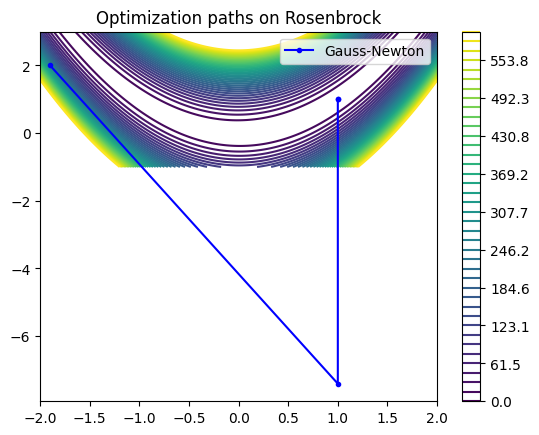

Final x: [1. 1.]
Final function value: 0.0


In [ ]:
x0 = np.array([-1.9, 2.0])

x_gn, traj_gn = gauss_newton(x0, rosen_residual, rosen_jacobian)


x1, x2 = np.meshgrid(np.linspace(-2, 2, 201), np.linspace(-1, 3, 201))
plt.contour(x1, x2, rosen(np.array([x1, x2])), levels=np.linspace(0, 600, 40))

plt.plot(traj_gn[:, 0], traj_gn[:, 1], 'b.-', label='Gauss-Newton')


plt.legend()
plt.colorbar()
plt.title("Optimization paths on Rosenbrock")
plt.show()
print("Final x:", x_gn)
print("Final function value:", rosen(x_gn))


# Levenberg Marquardt method

This method combines Gradient and Newton.

We define a new matrix $H$ which is the Hessian plus a diagonal matrix corresponding to a certain gain $v^k$, where $v^k$ is a regulating term to ensure that the Hessian is positive.


$$H_k=H(x_k)+v_kI$$
$$x_{k+1}= x_{k}- \alpha_k {H_k}^{-1} \nabla f(x_k)$$

It can also be approximated by

$$x_{k+1}= x_{k}- \alpha_k {(J (x_k)^T J (x_k)+v_kI)}^{-1} \nabla f(x_k)$$

$$x_{k+1}= x_{k}- \alpha_k {(J (x_k)^T J (x_k)+v_kI)}^{-1} J(x_k)^T F(x_k)$$


**Algorithm**

let $x_0,v_0, \nabla f(x_0) H_0(x_0)$ be

1. $H_k=H(x_k)+v_kI$
2. if $H_k \leq$ 0 then $v_k=c_0v_k$ and return in 1.
3. $x_{k+1}= x_{k}- \alpha _k {H_k}^{-1} \nabla f(x_k)$

In [ ]:
def levenberg_marquardt(x0, residual_func, jacobian_func, tol=1e-6, max_iter=10000, lambd=0.01):
   # Levenberg-Marquardt algorithm
    x = x0.copy()
    trajectory = [x.copy()]
    for i in range(max_iter):
        r = residual_func(x)
        J = jacobian_func(x)
        H_approx = J.T @ J
        g = J.T @ r
        I = np.eye(len(x))
        try:
            delta = np.linalg.solve(H_approx + lambd * I, -g)
        except np.linalg.LinAlgError:
            print("Singular")
            break
        x_new = x + delta
        # Accept step if residual norm decreases
        if np.linalg.norm(residual_func(x_new)) < np.linalg.norm(r):
            x = x_new
            lambd /= 10   # decrease damping factor
        else:
            lambd *= 10   # increase damping factor
        trajectory.append(x.copy())
        if np.linalg.norm(delta) < tol:
            print(f"Converged in {i+1} iterations.")
            break
    return x, np.array(trajectory)

Levenberg-Marquardt converged in 50 iterations.


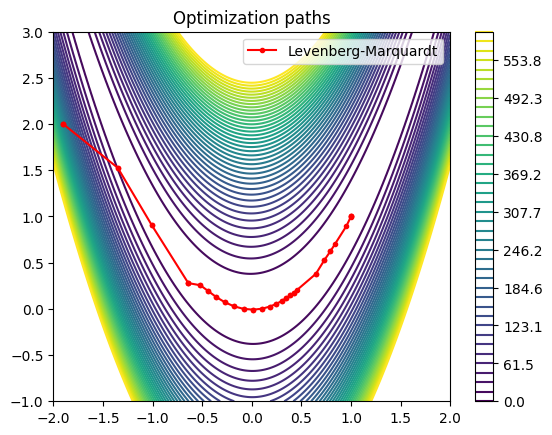

Final solution: [1. 1.]
Final function value: 1.838339390073603e-25
Number of iterations: 51


In [ ]:
x0 = np.array([-1.9, 2.0])
x_lm, traj_lm = levenberg_marquardt(x0, rosen_residual, rosen_jacobian)

x1, x2 = np.meshgrid(np.linspace(-2, 2, 201), np.linspace(-1, 3, 201))
plt.contour(x1, x2, rosen(np.array([x1, x2])), levels=np.linspace(0, 600, 40))

plt.plot(traj_lm[:, 0], traj_lm[:, 1], 'r.-', label='Levenberg-Marquardt')

plt.legend()
plt.colorbar()
plt.title("Optimization paths")
plt.show()
print("Final solution:", x_lm)
print("Final function value:", rosen(x_lm))
print("Number of iterations:", len(traj_lm))


# Simplex of Nelder and Mead


This is a purely geometric method.

The simplex descent method is also known as the
Nelder-Mead method. The idea is to use a moving simplex in the definition space to surround the optimal point, then shrink the simplex until its dimensions reach a given error tolerance.

In $n$-dimensional space, a simplex is a figure of $n+1$ vertices connected by a line and bounded by polygonal faces. If $n = 2$, a simplex is a triangle; if $n = 3$, it is a tetrahedron.

By applying motions in an appropriate sequence, the simplex can always converge to the minimum point, enclose it, and then shrink around it. The direction of a move is determined by the values of $f(x)$ (the function to be minimized) at the vertices. The vertex with the highest value of F is labeled Hi, and Lo is the vertex with the lowest value. The amplitude of a motion is controlled by the distance d measured from Hi to the centroid of the opposite side (in the case of the
triangle, the middle of the opposite side).

**Definition**
A simplex is a geometric shape with $n+1$ vertices in a $n$ dimensional space.

We speak of a regular simplex if the $x_i$ vertices are equidistant.

**Principle of the algorithm**

* We evaluate the cost function for each vertex $f(x_i)$.
* We look for $x_h=\arg \underset{x_i}\max f(x)$.
* We look for the mirror $x_r$ of $x_h$.
* We move in the direction of $x_r$ : reflection, expansion or contraction according to the case


## Reflection (n=2)

$$x_h = \arg \underset{x_i}\max f(x)$$
$$x_r = x_0+\alpha(x_0-x_h) = (1+\alpha)x_0-\alpha x_h$$
$$x_0 = \frac{1}{n}\sum_{\underset{i \neq h}{i=1}}^n x_i$$
and $$alpha > 0 | \alpha = \frac{green x_r-x_0}{x_h-x_0}$$

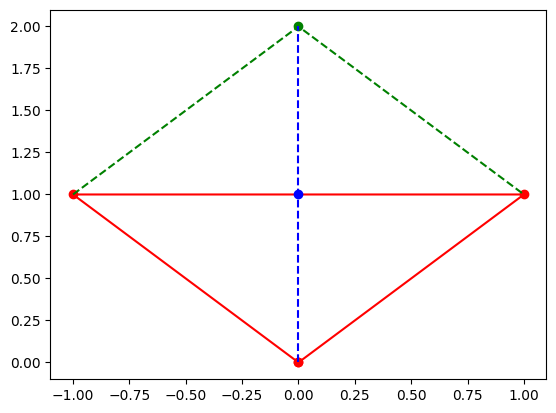

In [ ]:
xn = np.array( [[0,0],[-1,1], [1,1], [0,0]]) # points initiaux

# reflexion
xh = xn[0] # let us suppose here that x0 is the worst
x0 = (xn[1]+xn[2])/2
alpha = 1
xr = x0 + alpha*(x0-xh)

# log
xb = np.array([xn[0], x0, xr])
xg = np.array([xn[1], xr , xn[2]])

plt.plot(xn[:,0],xn[:,1],'r-o')
plt.plot(x0[0],x0[1],'bo')
plt.plot(xr[0],xr[1],'go')
plt.plot(xg[:,0],xg[:,1],'g--')
plt.plot(xb[:,0],xb[:,1],'b--')
plt.show()



## Contraction (n=2)

* si $f(x_r) > f(x_i) \forall i \neq h$, on rejette $x_r$
* et on calcule $x_c = \beta x_h +(1- \beta) x_0$ avec $ 0 \leq \beta \leq 1$ et
$\beta = \frac{\Vert x_c-x_0 \Vert}{x_h-x_0}$
* si $f(x_c) < \min(f(x_h),f(x_r))$ alors $x_c$ remplace $x_r$, sinon on remplace tous les $x_i$ par
$$x_i=\frac{x_i + \arg \underset{x_i}\min f(x)}{2}$$.

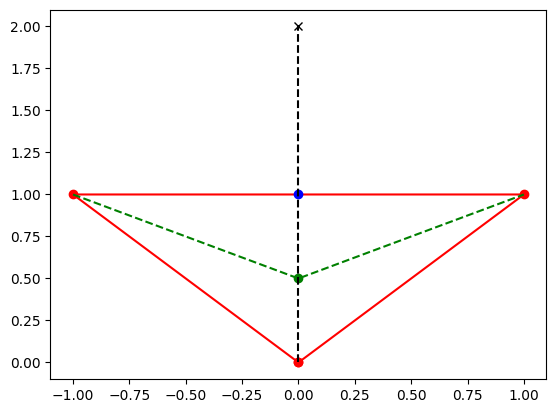

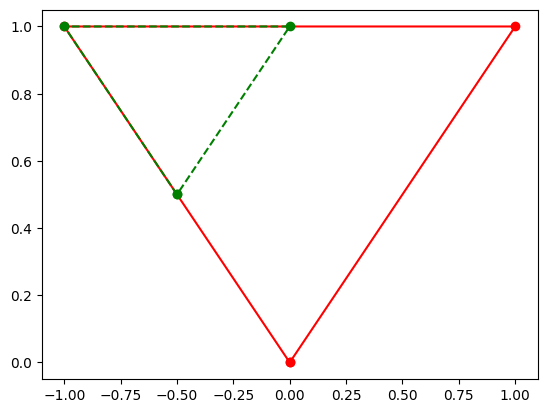

In [ ]:
xn = np.array( [[0,0],[-1,1], [1,1], [0,0]]) # init

# reflexion
xh = xn[0] # let us assume the first point is the worst
x0 = (xn[1]+xn[2])/2
alpha = 1
xr = x0 + alpha*(x0-xh)

# contraction if f(xr) is greater than f(xi)
beta = 0.5
xc = beta*xh + (1-beta)*x0

# log
xb = np.array([xn[0], x0, xr])
xg = np.array([xn[1], xc , xn[2]])

plt.plot(xn[:,0],xn[:,1],'r-o')
plt.plot(x0[0],x0[1],'bo')
plt.plot(xr[0],xr[1],'kx')
plt.plot(xc[0],xc[1],'go')
plt.plot(xg[:,0],xg[:,1],'g--')
plt.plot(xb[:,0],xb[:,1],'k--')
plt.show()

# if no result is satisfying
# and if x2 is the best
x1p = (xn[0]+xn[1])/2
x3p = (xn[2]+xn[1])/2

xg  =  np.array([x1p, xn[1], x3p, x1p])

plt.plot(xn[:,0],xn[:,1],'r-o')
plt.plot(xg[:,0],xg[:,1],'g--')
plt.plot(xg[:,0],xg[:,1],'go')

plt.show()


## Expansion (n=2)

if there is a significant decrease towards $x_r$, i.e. if
$$f(x_r)<f(x_i) \forall i \in [1,n]$$
then we construct a point $x_e$ such that
$$x_e = \gamma x_r +(1-\gamma)x_0$$ or $$gamma = \frac{green x_e-x_0}{x_h-x_0}>1$

if $f(x_e) < \underset{x_i}{\min}f(x_i)$ then we keep $x_e$, otherwise we keep $x_r$


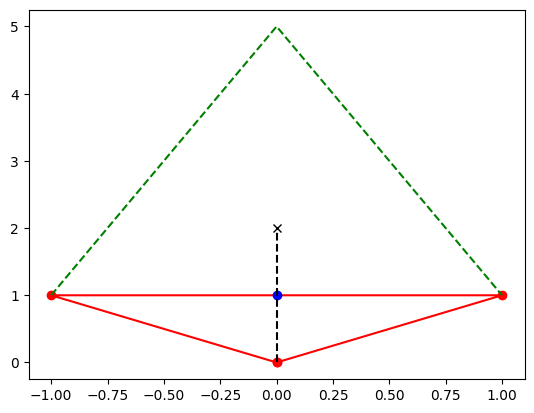

In [ ]:
xn = np.array( [[0,0],[-1,1], [1,1], [0,0]]) # points initiaux

# reflexion
xh = xn[0] # let us suppose the first point is the worst
x0 = (xn[1]+xn[2])/2
alpha = 1
xr = x0 + alpha*(x0-xh)

# expansion
gamma = 4
xe = gamma*xr + (1-gamma)*x0

# log
xb = np.array([xn[0], x0, xr])
xg = np.array([xn[1], xe , xn[2]])

plt.plot(xn[:,0],xn[:,1],'r-o')
plt.plot(x0[0],x0[1],'bo')
plt.plot(xr[0],xr[1],'kx')
plt.plot(xg[:,0],xg[:,1],'g--')
plt.plot(xb[:,0],xb[:,1],'k--')
plt.show()

**Algorithm**

* We choose an initial simplex composed of $x_i$ vertices
* We loop as long as $d>\varepsilon$, with $\varepsilon$ the tolerance on the error
    * We try a reflection, we obtain $x_r$.
    * If $f(x_r) < \min f(x_i)$,
        * we keep $x_r$
        * we try an expansion, we get $x_e$
            * If $f(x_e) < \min f(x_i)$, we keep $x_e$
    * Otherwise
        * If $f(x_r) > \max f(x_i)$
            * we try a contraction, $x_c$
            * If $f(x_c) < \max f(x_i)$, keep the contraction
        * Otherwise we try a reduction of all the points
* End

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    # Rosenbrock function
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

def initialize_simplex(x0, scale=1.0):
    n = len(x0)
    simplex = np.zeros((n+1, n))
    simplex[0] = x0
    for i in range(n):
        y = x0.copy()
        y[i] = y[i] + scale
        simplex[i+1] = y
    return simplex

def centroid(simplex, exclude):
    return np.mean(np.delete(simplex, exclude, axis=0), axis=0)

def nelder_mead(f, x0, tol=1e-5, max_iter=200, alpha=1, gamma=2, rho=0.5, sigma=0.5):

    n = len(x0)
    simplex = initialize_simplex(x0)
    history = [simplex.copy()]

    for iteration in range(max_iter):
        f_values = np.array([f(x) for x in simplex])
        indices = np.argsort(f_values)
        simplex = simplex[indices]
        f_values = f_values[indices]

        max_dist = np.max(np.linalg.norm(simplex - simplex[0], axis=1))
        if max_dist < tol:
            break

        x_best = simplex[0]
        x_worst = simplex[-1]
        x_second_worst = simplex[-2]
        centroid_point = centroid(simplex, -1)

        # Reflection
        x_reflect = centroid_point + alpha * (centroid_point - x_worst)
        f_reflect = f(x_reflect)

        if f_values[0] <= f_reflect < f_values[-2]:
            # Accept reflection
            simplex[-1] = x_reflect

        elif f_reflect < f_values[0]:
            # Expansion
            x_expand = centroid_point + gamma * (x_reflect - centroid_point)
            f_expand = f(x_expand)
            if f_expand < f_reflect:
                simplex[-1] = x_expand
            else:
                simplex[-1] = x_reflect

        else:
            # Contraction
            if f_reflect < f_values[-1]:
                # Outside contraction
                x_contract = centroid_point + rho * (x_reflect - centroid_point)
            else:
                # Inside contraction
                x_contract = centroid_point + rho * (x_worst - centroid_point)
            f_contract = f(x_contract)
            if f_contract < min(f_reflect, f_values[-1]):
                simplex[-1] = x_contract
            else:
                # Shrink
                for i in range(1, n+1):
                    simplex[i] = simplex[0] + sigma * (simplex[i] - simplex[0])

        history.append(simplex.copy())

    return simplex[0], history


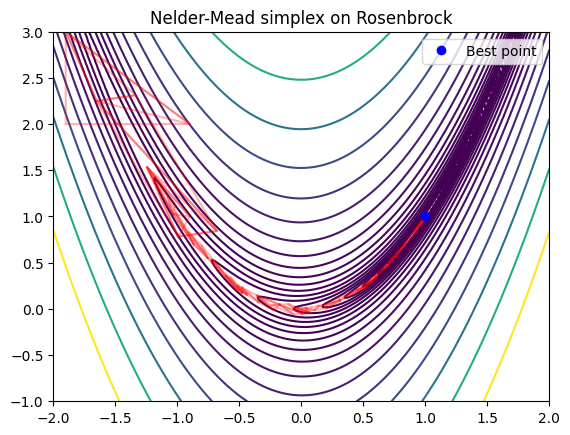

Final solution: [1.00000083 1.00000182]
Function value at final solution: 3.286282264619651e-12


In [ ]:
x0 = np.array([-1.9, 2.0])
best, history = nelder_mead(f, x0)
x1, x2 = np.meshgrid(np.linspace(-2, 2, 201), np.linspace(-1, 3, 201))
plt.contour(x1, x2, f(np.array([x1, x2])), levels=np.logspace(-1, 3, 20), cmap='viridis')

for simplex in history:
    poly = np.vstack([simplex, simplex[0]])
    plt.plot(poly[:, 0], poly[:, 1], 'r-', alpha=0.3)

plt.plot(best[0], best[1], 'bo', label='Best point')
plt.legend()
plt.title("Nelder-Mead simplex on Rosenbrock")
plt.show()
best_point, history = nelder_mead(f, np.array([-1.9, 2.0]))

print("Final solution:", best_point)
print("Function value at final solution:", f(best_point))
